In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import h5py
import requests
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import tensorflow as tf

In [8]:
#ZIP_PATH = "https://drive.google.com/drive/folders/1jzHYpTwywUYA53nMGHVROSuVO14hEueq?usp=sharing/"
FILE_NAME ="SynthText_train.h5"

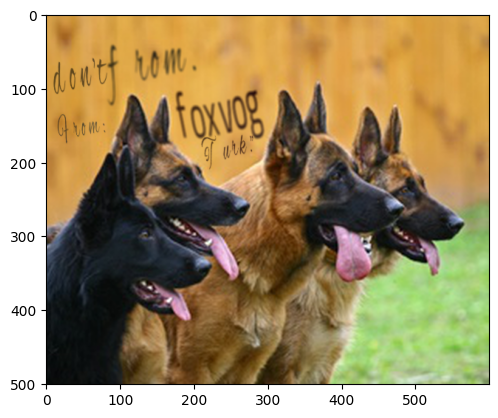

In [9]:

db = h5py.File(FILE_NAME, 'r')

im_names = list(db['data'].keys())
#im = im_names[0]
#print(im_names)
im = 'dog_136.jpg_0'
img  = db['data'][im][:]
#img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#print(img.shape)
plt.imshow(img)
#plt.show()
#print(im_names[0])
font = db['data'][im].attrs['font']
#print(font)
txt = db['data'][im].attrs['txt']
#print(txt)
charBB = db['data'][im].attrs['charBB']
#print(charBB)
wordBB = db['data'][im].attrs['wordBB']
#print(wordBB)


In [10]:
def sort_points(points, center):
    # calculate the angle of each point from the center point
    angles = np.arctan2(points[:, 1] - center[1], points[:, 0] - center[0])
    # sort the points by angle
    sorted_points = points[np.argsort(angles)]
    return sorted_points

In [11]:
def draw_points(image, points, color=(255, 0, 0), radius=3):
    # create a copy of the image
    img = image.copy()
    # iterate over the points and draw them on the image
    for point in points:
        cv2.circle(img, tuple(map(int, point)), radius, color, -1)
    return img

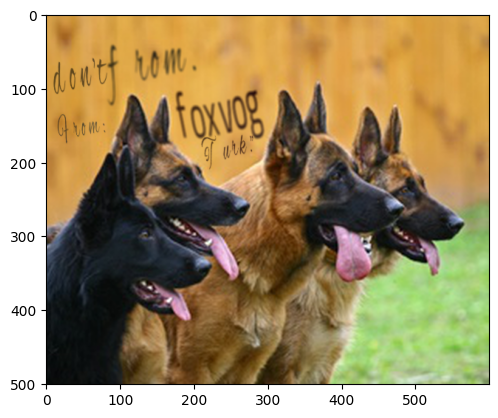

[[[ -2.6773643 204.63312    58.878742    7.5194054 166.832    ]
  [ 81.37381   277.4168    178.54675    71.23103   301.72232  ]
  [ 90.88307   287.62744   207.65929    83.22307   302.5601   ]
  [  6.8319054 214.84375    87.99127    19.511433  167.66977  ]]

 [[ 68.890144  168.55946    48.606434  138.25876   103.403145 ]
  [ 49.832848  151.731       4.890793  119.3602    101.75638  ]
  [ 91.773     195.89232    84.58397   159.78827   170.37961  ]
  [110.8303    212.72078   128.2996    178.68683   172.02637  ]]]
(2, 4, 5)
7
138
[[[ -2.67736515  24.36401535  39.10355239  59.45055972  61.795752
   204.63309776 235.98990521 246.86829368 255.41148067 276.51518284
   274.58356122  58.87874421 111.25368954 133.02638229 152.03647278
   197.71151551   7.51940359  31.62183882  43.31990943  53.51441745
    74.00208435 166.87614277 189.5597713  207.82750576 232.33248581
   246.43487315 262.97889056]
  [ 18.58921168  38.31399847  56.41152106  64.52801989  79.11439962
   228.85388148 247.40615518 257

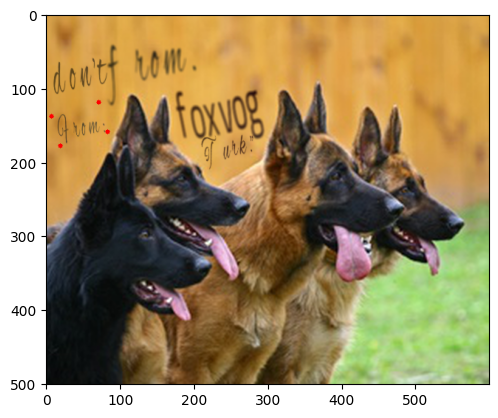

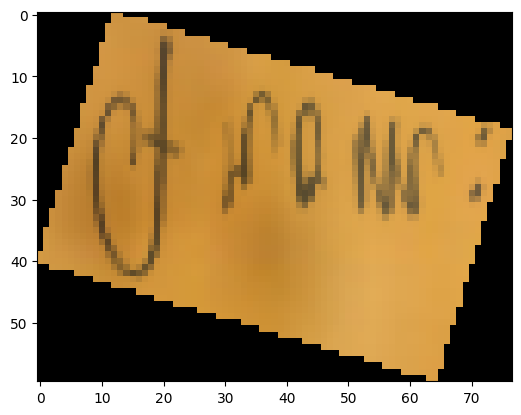

'\n# define the four bounding points\npoints = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])\nprint(points)\nprint(txt[WORD])\n# calculate the center point of the bounding box\ncenter = tuple(np.mean(points, axis=0).astype(np.int32))\n# sort the points in a clockwise order, starting from the top-left point\npoints = sort_points(points, center)\nprint(points)\n\n# calculate the angle of rotation\ns = np.linalg.norm(points[1]-points[0])\ns_next = np.linalg.norm(points[2]-points[1])\nprint(s, s_next)\ncos_angle = min(max(s/s_next, -1), 1)\nangle = np.degrees(np.arccos(cos_angle))-90\nprint(angle)\n\n# rotate the image\nrows,cols = img.shape[:2]\nM = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)\nimg_rotated = cv2.warpAffine(img,M,(cols,rows))\nplt.imshow(img_rotated)\nplt.show()\n\n# calculate the width and height of the bounding box\nheight = int(np.linalg.norm(points[1]-points[0]))\nwidth = int(np.linalg.norm(points[2]-points[1]))\nprint(width, height)\n# define the destinatio

In [12]:

plt.imshow(img)
plt.show()
#x = wordBB[0][0][1]
#y= wordBB[0][1][1]
#print(x,y)
WORD = 3
print(wordBB)
print(wordBB.shape)
x1 = int(wordBB[0,0,WORD])
y1 = int(wordBB[1,0,WORD])

print(x1)
print(y1)
x2 = int(wordBB[0,1,WORD])
y2 = int(wordBB[1,1,WORD])

#print(y1)
#print(y2)
x3 = int(wordBB[0,2,WORD])
y3 = int(wordBB[1,2,WORD])
#print(x1)
#print(x2)
x4 = int(wordBB[0,3,WORD])
y4 = int(wordBB[1,3,WORD])
#print(y3)
#print(y4)
"""
top_left_x = min([x1,x2,x3,x4])
top_left_y = min([y1,y2,y3,y4])
bot_right_x = max([x1,x2,x3,x4])
bot_right_y = max([y1,y2,y3,y4])
#print(str(top_left_x)+','+str(bot_right_x))
#print(str(top_left_y)+','+str(bot_right_y))
"""
top_left_x = min([x1,x2,x3,x4])
top_left_y = min([y1,y2,y3,y4])
bot_right_x = max([x1,x2,x3,x4])
bot_right_y = max([y1,y2,y3,y4])
print(charBB)
points = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
print(points)
pointed  = draw_points(img, points)
plt.imshow(pointed)
plt.show()

# create an empty image with the same shape as the input image
mask = np.zeros_like((img))

# create a list of the bounding box points in the correct format
bounding_box = np.array([points], dtype=np.int32)

# fill the area inside the bounding box with white
cv2.fillPoly(mask, bounding_box, (255, 255, 255))

# apply the mask to the image
res = cv2.bitwise_and(img, mask)[top_left_y:bot_right_y+1, top_left_x:bot_right_x+1]

#res = img[top_left_y:bot_right_y+1, top_left_x:bot_right_x+1]

#flipping
if(x2 < x1):
    res = cv2.flip(res, 1)
if(y2 < y1):
    res = cv2.flip(res, 0)
#rotate


plt.imshow(res)
plt.show()
#print(chr(txt[0][0]))
#print(txt)
#print(wordBB)
# define the four bounding points
"""
# define the four bounding points
points = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
print(points)
print(txt[WORD])
# calculate the center point of the bounding box
center = tuple(np.mean(points, axis=0).astype(np.int32))
# sort the points in a clockwise order, starting from the top-left point
points = sort_points(points, center)
print(points)

# calculate the angle of rotation
s = np.linalg.norm(points[1]-points[0])
s_next = np.linalg.norm(points[2]-points[1])
print(s, s_next)
cos_angle = min(max(s/s_next, -1), 1)
angle = np.degrees(np.arccos(cos_angle))-90
print(angle)

# rotate the image
rows,cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
img_rotated = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(img_rotated)
plt.show()

# calculate the width and height of the bounding box
height = int(np.linalg.norm(points[1]-points[0]))
width = int(np.linalg.norm(points[2]-points[1]))
print(width, height)
# define the destination points for the perspective transform
dst = np.float32([[0,0],[width,0],[width,height],[0,height]])
print(dst)

# create a copy of the points
points_rotated = points.copy()
angle = 90-angle
print(points)
# rotate the points
for i in range(4):
    x, y = points_rotated[i, :]
    print(x,y)
    x_rotated = (x - cols/2) * np.cos(angle) - (y - rows/2) * np.sin(angle) + cols/2
    y_rotated = (x - cols/2) * np.sin(angle) + (y - rows/2) * np.cos(angle) + rows/2
    points_rotated[i, :] = [x_rotated, y_rotated]
print(points_rotated)
# calculate the perspective transform matrix
M = cv2.getPerspectiveTransform(points_rotated, dst)

# apply the perspective transform
img_cropped = cv2.warpPerspective(img_rotated, M, (width, height))
plt.imshow(img_cropped)
plt.show()
"""